# Applied ML

In [1]:
# Normal stack of pandas, numpy, matplotlib and seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Statistical test library
import scipy.stats as stats
import random

%matplotlib inline

np.random.seed(10)
random.seed(10)

# Data pre-processing

In [2]:
# Load the dataset
original = pd.read_csv("CrowdstormingDataJuly1st.csv", parse_dates=['birthday'], infer_datetime_format=True)

In [3]:
original.describe()

/Applications/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,641.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1604.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,2345.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


In [4]:
from pandas.tools.plotting import scatter_matrix

#scatter_matrix(original, figsize=(30, 30), diagonal='histogram')

In [5]:
# First glimpse at data content
original.ix[:10,:13]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,1983-08-31,177.0,72.0,Attacking Midfielder,1,0,0,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,1982-01-08,179.0,82.0,Right Winger,1,0,0,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,1992-12-17,181.0,79.0,NaN,1,0,1,0,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,1993-08-31,191.0,87.0,Center Back,1,1,0,0,0
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,1991-07-18,172.0,70.0,Right Midfielder,1,1,0,0,0
5,aaron-hughes,Aaron Hughes,Fulham FC,England,1979-11-08,182.0,71.0,Center Back,1,0,0,1,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,1985-11-10,187.0,80.0,Left Fullback,1,1,0,0,0
7,alexander-tettey,Alexander Tettey,Norwich City,England,1986-04-04,180.0,68.0,Defensive Midfielder,1,0,0,1,0
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,1984-04-13,193.0,80.0,Goalkeeper,1,0,1,0,0
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,1987-03-13,180.0,70.0,Right Fullback,1,1,0,0,0


Challenges in dataset:

- Skin ratings don't match -> take average
- Picture was missing -> exclude from training
- No cards drawn in some dyads


Prune dataset where there is no rater information

# Initial cleaning


In [6]:
original['year']= original['birthday'].dt.year
original['month']= original['birthday'].dt.month
original['day']= original['birthday'].dt.day
original.drop('birthday', axis=1, inplace=True)

In [7]:
grouped = original[['refNum', 'games']].groupby(['refNum']).sum()
grouped_df = grouped[grouped['games'] >= 22].reset_index()

In [8]:
referees_df = original[original['refNum'].isin(grouped_df['refNum'].values)]

In [9]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer()

# Function to round on quater ratings
def round_quarter(x):
    return round(x*4)/4

def binary_class(x):
    if x < 0.5:
        return 0
    else:
        return 1

In [10]:
rater = referees_df.copy()
#rater['rater_mean'] = round_quarter(rater[['rater1','rater2']].mean(axis=1))
rater['rater_mean'] = rater[['rater1','rater2']].mean(axis=1).apply(binary_class)
rater['rater_mean'].head(5)

5    0
6    0
7    1
8    0
9    0
Name: rater_mean, dtype: int64

In [11]:
rater = rater.dropna(subset=['rater_mean'])
rater['rater_mean'].head()

5    0
6    0
7    1
8    0
9    0
Name: rater_mean, dtype: int64

Get rid of unusable columns

In [12]:
# rater.columns[:16] | rater.columns[20:] - ['Alpha_3']

In [13]:
rater.columns


Index(['playerShort', 'player', 'club', 'leagueCountry', 'height', 'weight',
       'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp', 'year', 'month', 'day', 'rater_mean'],
      dtype='object')

In [14]:
features = rater

# Take only the features that describes the player
# Feature 1 contains the short name of the player
# Feature 16 and upwards contains the information about the rater

#TODO: add referee columns
features = features.reset_index(drop=True)
# features = rater[ rater.columns[:16] | ['rater_mean']]
features.head()

,playerShort,player,club,leagueCountry,height,weight,position,games,victories,ties,...,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,year,month,day,rater_mean
0,aaron-hughes,Aaron Hughes,Fulham FC,England,182.0,71.0,Center Back,1,0,0,...,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1979,11,8,0
1,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,187.0,80.0,Left Fullback,1,1,0,...,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1985,11,10,0
2,alexander-tettey,Alexander Tettey,Norwich City,England,180.0,68.0,Defensive Midfielder,1,0,0,...,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1986,4,4,1
3,anders-lindegaard,Anders Lindegaard,Manchester United,England,193.0,80.0,Goalkeeper,1,0,1,...,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1984,4,13,0
4,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,180.0,70.0,Right Fullback,1,1,0,...,0.325185,127.0,0.003297,0.538462,130.0,0.013752,1987,3,13,0


In [15]:
features.shape

(137635, 31)

Convert string values to floats by LabelEncoder to make them readable by the classifier

In [16]:
features['refNum'].unique().shape

(1261,)

In [17]:
# Split birthday into year...
# features_t = features[features['birthday'].str.split('-')]
# features_t

In [18]:


# Workaround by removing problematic columns
#features = features.drop('position', axis=1)
#features = features.drop('Alpha_3', axis=1)
#features.head()


## Feature transformation

When we have categorical data, we need to transform them so that they can be taken into account in our model. One way of doing this is to use LabelEncoder and OneHotEncoder from SciKitLearn. 

LabelEncoder converts each category into an integer, so that we don't have to deal with strings. After doing this transformation, we use OneHotEncoder to make a binary feature for each category. This way, we can capture for instance wether a person has played for both Fulham FC and Manchester City. 

In [19]:
# We select those features that contains some categorical value
# At the same time, we fill the NaN-values by '' to avoid problems later on
categorical_features = features[['leagueCountry','position']].fillna('Missing')


columns = []
for cat in categorical_features.columns:
    counts = categorical_features[cat].value_counts()
    n_cats = len(counts)
    
    columns += list(counts.keys().values)

    print("%s (%i categories):" % (cat.capitalize(), n_cats))
    print("%s\n" % counts[:10])

Leaguecountry (4 categories):
England    43725
Germany    36563
Spain      30320
France     27027
Name: leagueCountry, dtype: int64

Position (13 categories):
Center Back             21162
Center Forward          17435
Missing                 16778
Defensive Midfielder    14937
Goalkeeper              11453
Attacking Midfielder    11082
Left Fullback            9329
Right Fullback           8666
Left Midfielder          6277
Center Midfielder        5819
Name: position, dtype: int64



In [20]:
# Our categorical_features now looks like this:
categorical_features.head()

,leagueCountry,position
0,England,Center Back
1,England,Left Fullback
2,England,Defensive Midfielder
3,England,Goalkeeper
4,Germany,Right Fullback


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Step 1: Transform each category into an integer
## For this, we use LabelEncoder from sklearn

label_encoded = categorical_features.apply(LabelEncoder().fit_transform)
label_encoded.head()

,leagueCountry,position
0,0,1
1,0,6
2,0,4
3,0,5
4,2,10


In [22]:
# Step 2: Transform each integer into a binary feature
## For this, we use OneHotEncoder

one_hot_encoded = OneHotEncoder().fit_transform(label_encoded).toarray()
one_hot_encoded_features = pd.DataFrame(one_hot_encoded, columns=columns)
one_hot_encoded_features.head()

,England,Germany,Spain,France,Center Back,Center Forward,Missing,Defensive Midfielder,Goalkeeper,Attacking Midfielder,Left Fullback,Right Fullback,Left Midfielder,Center Midfielder,Right Winger,Right Midfielder,Left Winger
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


We remove the original categorical features, and attatch the new one_hot_encoded ones :

In [23]:
features_no_categorical = features.drop( categorical_features.columns, axis=1)
features_no_categorical.shape


(137635, 29)

In [24]:
features_one_hot_encoded = features_no_categorical.join(one_hot_encoded_features)
features_one_hot_encoded.head()

,playerShort,player,club,height,weight,games,victories,ties,defeats,goals,...,Defensive Midfielder,Goalkeeper,Attacking Midfielder,Left Fullback,Right Fullback,Left Midfielder,Center Midfielder,Right Winger,Right Midfielder,Left Winger
0,aaron-hughes,Aaron Hughes,Fulham FC,182.0,71.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,187.0,80.0,1,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,alexander-tettey,Alexander Tettey,Norwich City,180.0,68.0,1,0,0,1,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,anders-lindegaard,Anders Lindegaard,Manchester United,193.0,80.0,1,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,andreas-beck,Andreas Beck,1899 Hoffenheim,180.0,70.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Feature combinations

In [25]:
cards = features_one_hot_encoded[['redCards', 'yellowCards', 'yellowReds']]

iat = pd.DataFrame(cards.sum(axis=1) * features_one_hot_encoded['meanIAT'], columns=['IAT_comb'])
features_one_hot_encoded.join(iat, rsuffix="IAT_comb")

,playerShort,player,club,height,weight,games,victories,ties,defeats,goals,...,Goalkeeper,Attacking Midfielder,Left Fullback,Right Fullback,Left Midfielder,Center Midfielder,Right Winger,Right Midfielder,Left Winger,IAT_comb
0,aaron-hughes,Aaron Hughes,Fulham FC,182.0,71.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,187.0,80.0,1,1,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,alexander-tettey,Alexander Tettey,Norwich City,180.0,68.0,1,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,anders-lindegaard,Anders Lindegaard,Manchester United,193.0,80.0,1,0,1,0,0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,andreas-beck,Andreas Beck,1899 Hoffenheim,180.0,70.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000
5,antonio-rukavina,Antonio Rukavina,Real Valladolid,177.0,74.0,2,2,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.325185
6,ashkan-dejagah,Ashkan Dejagah,Fulham FC,181.0,74.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000
7,benedikt-hoewedes,Benedikt Höwedes,FC Schalke 04,187.0,80.0,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8,chris-baird,Chris Baird,Fulham FC,186.0,77.0,1,0,0,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
9,chris-brunt,Chris Brunt,West Bromwich Albion,185.0,74.0,1,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000


In [26]:
meanIAT = features_one_hot_encoded['meanIAT']
combIAT = pd.DataFrame(cards.sum(axis=1) * meanIAT, columns=['combIAT'])

features_with_gen = features_one_hot_encoded.join(combIAT)

### Aggregating over the players:

We now run grouping and aggregation of our dataframe. The aggregation functions used are defined in two dictionarys.
Each element of the dictionarys contains of a column name and an aggregation function, which is applied to our grouped features.

In [27]:
grouped_features = features_with_gen.groupby(['playerShort','year','height', 'weight'])

# Aggregating with max gives us a logical OR on the one hot encoded features
one_hot_enc_aggfunc_mapping = {i: sum for i in one_hot_encoded_features.columns}
column_aggfunc_mapping = {'rater_mean': max,'games': sum, 'victories': sum, 'ties': sum, 'defeats': sum, 'goals': sum, 'yellowCards': sum, 'yellowReds': sum, 'redCards': sum, 'meanIAT': np.mean, 'nIAT': np.mean, 'meanExp': np.mean, 'nExp': np.mean, 'combIAT': sum}

aggregated_features = grouped_features.agg({**one_hot_enc_aggfunc_mapping, **column_aggfunc_mapping})
aggregated_features = aggregated_features.reset_index().set_index('playerShort')
aggregated_features.head()

,year,height,weight,goals,Left Winger,England,Germany,yellowReds,Goalkeeper,meanIAT,...,Right Winger,defeats,Left Fullback,victories,France,Center Midfielder,Right Fullback,Attacking Midfielder,Spain,Defensive Midfielder
playerShort,,,,,,,,,,,,,,,,,,,,,
aaron-hughes,1979,182.0,71.0,9,0.0,162.0,0.0,0,0.0,0.344413,...,0.0,225,0.0,246,0.0,0.0,0.0,0.0,0.0,0.0
aaron-hunt,1986,183.0,73.0,62,0.0,0.0,0.0,0,0.0,0.348943,...,0.0,122,0.0,141,0.0,0.0,0.0,0.0,98.0,0.0
aaron-lennon,1987,165.0,63.0,31,0.0,101.0,0.0,0,0.0,0.345893,...,0.0,115,0.0,200,0.0,0.0,0.0,0.0,0.0,0.0
aaron-ramsey,1990,178.0,76.0,39,0.0,98.0,0.0,0,0.0,0.346790,...,0.0,67,0.0,145,0.0,0.0,0.0,0.0,0.0,98.0
abdelhamid-el-kaoutari,1990,180.0,73.0,1,0.0,0.0,37.0,4,0.0,0.331600,...,0.0,43,0.0,41,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
games = aggregated_features['games']
game_dep = aggregated_features[['Center Forward', 'defeats', 'yellowCards', 'meanIAT', 'Spain',
       'Germany', 'Left Winger', 'England', 'France', 'nExp',
       'Attacking Midfielder', 'victories', 'Defensive Midfielder', 'nIAT',
       'yellowReds', 'Left Fullback', 'Goalkeeper', 'Center Back',
       'combIAT', 'meanExp', 'Missing', 'Left Midfielder', 'goals', 'redCards',
       'Right Fullback', 'Center Midfielder', 'Right Winger',
       'Right Midfielder', 'ties']]

game_normalized = game_dep.div(games, axis='rows')

In [29]:
rating = aggregated_features['rater_mean']
prepped_features = aggregated_features[aggregated_features.columns[:3]].join(game_normalized).join(rating).join(games)

In [30]:
prepped_features.columns

Index(['year', 'height', 'weight', 'Center Forward', 'defeats', 'yellowCards',
       'meanIAT', 'Spain', 'Germany', 'Left Winger', 'England', 'France',
       'nExp', 'Attacking Midfielder', 'victories', 'Defensive Midfielder',
       'nIAT', 'yellowReds', 'Left Fullback', 'Goalkeeper', 'Center Back',
       'combIAT', 'meanExp', 'Missing', 'Left Midfielder', 'goals', 'redCards',
       'Right Fullback', 'Center Midfielder', 'Right Winger',
       'Right Midfielder', 'ties', 'rater_mean', 'games'],
      dtype='object')

Prepared dataset for further processing with ML methods

In [31]:
from sklearn import preprocessing


Xy = prepped_features.apply(LabelEncoder().fit_transform)

In [33]:
Xt = Xy.drop(['rater_mean'], axis=1)
y = Xy['rater_mean']

print('Samples:', Xt.shape)
print('Lables:', y.shape)

Samples: (1971, 33)
Lables: (1971,)


## Normalizing

In [34]:

X = preprocessing.normalize(Xt, norm='l2')
X

array([[ 0.00441811,  0.01159753,  0.00938848, ...,  0.        ,
         0.5726973 ,  0.27889309],
       [ 0.00549229,  0.00805536,  0.0069569 , ...,  0.        ,
         0.12302736,  0.1211966 ],
       [ 0.00752148,  0.00188037,  0.00423083, ...,  0.00705139,
         0.26466205,  0.18709679],
       ..., 
       [ 0.00380995,  0.01000111,  0.01047735, ...,  0.        ,
         0.56530065,  0.18287738],
       [ 0.00381746,  0.00704762,  0.00880953, ...,  0.        ,
         0.37411121,  0.01350794],
       [ 0.00559303,  0.00932171,  0.00894884, ...,  0.        ,
         0.25168625,  0.05928609]])

## Machine Learning by RandomForestClassifier

### Base model

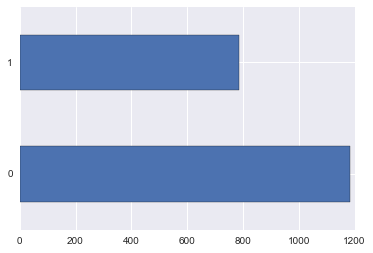

In [130]:
y.value_counts().plot(kind='barh', stacked=True)

In [124]:
print('There are about %.2f%% 0s in the class vector.' % (y.value_counts()[0] / y.shape[0]))

There are about 0.60% 0s in the class vector.


The result above shows that by allways predicting 0, we could achieve an accuracy of approximately 60%. 
We should therefore expect that our classifier performs at least as good as this, and hopefully significantly better. 

### Tuning the model

In [87]:
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [89]:
rfc = RandomForestClassifier(n_jobs=-1, n_estimators=200, random_state=42) 

param_grid = {
    'max_features': ['log2','sqrt', None],
    'min_samples_leaf': [2,20,200],
    'max_depth': [4,8,16,None],
}

#(8)    'max_depth': [4,8,16,None],
#(gini) 'criterion': ['gini', 'entropy'],
#(log2) 'max_features': ['log2','sqrt', None],
#(20) 'min_samples_split': [2,20,200],
#(2) 'min_samples_leaf': [2,20,200],
#(20) 'min_samples_split': [2,20,200],
#(1e-7) 'min_impurity_split': [1e-07, 1e-06, 1e-05],
#(True) 'bootstrap': [True, False],

#### Optimizing for F1 score

In [ ]:
CV_rfc = GridSearchCV(estimator=rfc, scoring='f1', param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
CV_rfc.fit(X, y, )
print(CV_rfc.best_params_)

#### Optimizing for accuracy

In [90]:
CV_rfc = GridSearchCV(estimator=rfc, scoring='accuracy', param_grid=param_grid, cv=10, verbose=True, n_jobs=-1)
CV_rfc.fit(X, y, )
print(CV_rfc.best_params_)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 360 out of 360 | elapsed:  4.2min finished


{'max_features': 'log2', 'max_depth': 8, 'min_samples_leaf': 2}


### Training the model

We use the results found in the grid search to tune our random forrest classifier. 

Description of the hyperparameters:

- n_estimators: The number of trees used in random forest
- min_samples_leaf: TODO
- max_features: TODO
- max_depth: The maximal depth of the tree

- bootstrap: Todo
- oob_score: Todo
- n_jobs: Number of processes used in the calculation. -1 uses all avilable.
- random_state: Seed for the random generator, to give reproducable results.

In [94]:
rfc = RandomForestClassifier(n_estimators=1000, min_samples_leaf=2, max_features='log2', max_depth=8, bootstrap=True, oob_score=True, random_state=4, n_jobs=-1)
print(rfc)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=True, random_state=7,
            verbose=0, warm_start=False)


We can then fit our model to the data:

In [95]:
rfc.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=True, random_state=7,
            verbose=0, warm_start=False)

## Inspect most relevant features of RandomForest

In [ ]:
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d : %s  (%f)" % (f + 1, indices[f], Xt.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.xlabel("Feature")
plt.ylabel("Feature importance")
plt.show()

## Performance assessment 

### Cross-validation

In [45]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
scores = cross_val_score(rfc, X, y, cv=10, scoring='f1', n_jobs=-1)
print(scores)
print('Achieved model score: ', np.mean(scores))

[ 0.7027027   0.64233577  0.56737589  0.70588235  0.73239437  0.71428571
  0.69064748  0.68253968  0.71830986  0.68613139]
Achieved model score:  0.684260519965


Visualize score results as boxplots

In [ ]:
plt.boxplot(scores)

### Confusion matrix

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1576, 33) (395, 33) (1576,) (395,)


In [70]:
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.75      0.87      0.81       233
          1       0.76      0.58      0.66       162

avg / total       0.75      0.75      0.74       395



# Bonus: Learning curve


In [102]:
#train_sizes = np.arange(300,1201, int((1201-300)/20))
train_sizes = np.arange(0.1, 1.0, 0.8/3)
train_sizes.shape

(4,)

In [103]:
from sklearn.model_selection import learning_curve

rfc = RandomForestClassifier(
    n_estimators=1000, min_samples_leaf=2, max_features='log2', max_depth=8,
    bootstrap=True, oob_score=True, random_state=4, n_jobs=-1)

train_sizes, train_scores, test_scores = learning_curve(
     rfc, X, y, train_sizes=train_sizes, cv=10, n_jobs=-1)

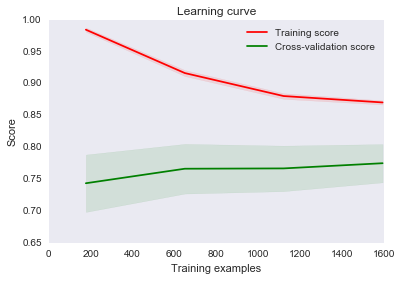

In [104]:
plt.figure()
plt.title("Learning curve")

plt.xlabel("Training examples")
plt.ylabel("Score")

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, '-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, '-', color="g",
         label="Cross-validation score")

plt.legend(loc="best")

In [ ]:
plt.savefig("Learning_curve")

## TODO

- Verify if classifier should be categorical of binary
- Take into account the referee statistics in a smart way (see Slack discussion)
- Try different parameters for the random forest to compare results (bias, variance)
- Bonus
- Exercise 2
